## 지하철 이용패턴

### 1. 데이터 불러오기 

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스 기호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'  # mac 한글

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("./2021년 11월  교통카드 통계자료.xls", sheet_name=3)

In [2]:
# 첫번째 row 및 사용하지 않는 columns 제거
df.drop(index=0, inplace=True)
df.drop(columns=['사용월', '역ID', '작업일시'], inplace=True)

In [3]:
# column 이름 변경
col_names = []

for i in range(24):  # 승/하차 columns(48개 / 2)
    col_names.append(f"승차_{(i+4) % 24}시")
    col_names.append(f"하차_{(i+4) % 24}시")
    
df.columns = df.columns[:2].tolist() + col_names

In [4]:
# dtype 변경
for col in df.columns[2:]:
    df[col] = df[col].str.replace(",", "").astype(np.int32)
    
df.tail()

,호선명,지하철역,승차_4시,하차_4시,승차_5시,하차_5시,승차_6시,하차_6시,승차_7시,하차_7시,...,승차_23시,하차_23시,승차_0시,하차_0시,승차_1시,하차_1시,승차_2시,하차_2시,승차_3시,하차_3시
605,우이신설선,북한산보국문,3,0,1954,501,6236,2314,20315,4547,...,1025,5016,0,0,0,0,0,0,0,0
606,우이신설선,정릉,2,2,1948,443,5096,1819,14458,3477,...,606,2544,0,1,0,0,0,0,0,0
607,우이신설선,성신여대입구(돈암),1,0,749,448,971,1239,3467,3789,...,1975,1479,1,0,0,0,0,0,0,0
608,우이신설선,보문,1,0,440,184,851,1345,1944,2943,...,468,822,2,31,0,0,0,0,0,0
609,우이신설선,신설동,73,1,865,829,917,2033,1386,4744,...,556,527,1,131,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 1 to 609
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     609 non-null    object
 1   지하철역    609 non-null    object
 2   승차_4시   609 non-null    int32 
 3   하차_4시   609 non-null    int32 
 4   승차_5시   609 non-null    int32 
 5   하차_5시   609 non-null    int32 
 6   승차_6시   609 non-null    int32 
 7   하차_6시   609 non-null    int32 
 8   승차_7시   609 non-null    int32 
 9   하차_7시   609 non-null    int32 
 10  승차_8시   609 non-null    int32 
 11  하차_8시   609 non-null    int32 
 12  승차_9시   609 non-null    int32 
 13  하차_9시   609 non-null    int32 
 14  승차_10시  609 non-null    int32 
 15  하차_10시  609 non-null    int32 
 16  승차_11시  609 non-null    int32 
 17  하차_11시  609 non-null    int32 
 18  승차_12시  609 non-null    int32 
 19  하차_12시  609 non-null    int32 
 20  승차_13시  609 non-null    int32 
 21  하차_13시  609 non-null    int32 
 22  승차_14시  609 non-null    in

### 2. EDA

In [6]:
# 호선
df.호선명.value_counts()

5호선         56
7호선         51
2호선         50
경부선         39
6호선         39
분당선         35
3호선         34
경원선         30
경의선         29
4호선         26
9호선         25
중앙선         21
경인선         20
경춘선         19
수인선         18
8호선         17
공항철도 1호선    14
9호선2~3단계    13
안산선         13
우이신설선       13
일산선         11
경강선         11
1호선         10
과천선          8
장항선          7
Name: 호선명, dtype: int64

In [7]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
승차_4시,609.000000,214.275862,730.401737,0.000000,5.000000,24.000000,123.000000,11576.000000
하차_4시,609.000000,2.738916,6.812514,0.000000,0.000000,0.000000,2.000000,92.000000
승차_5시,609.000000,4773.607553,5407.044476,0.000000,1337.000000,3151.000000,6209.000000,40053.000000
하차_5시,609.000000,1216.275862,1315.836737,0.000000,385.000000,843.000000,1577.000000,10474.000000
승차_6시,609.000000,9846.389163,9443.411994,0.000000,3107.000000,7345.000000,13546.000000,75013.000000
하차_6시,609.000000,6432.412151,6641.699066,0.000000,2252.000000,4470.000000,8304.000000,48420.000000
승차_7시,609.000000,25392.817734,25022.494973,0.000000,7449.000000,18268.000000,35133.000000,199033.000000
하차_7시,609.000000,14817.957307,19008.442489,0.000000,4528.000000,8622.000000,16511.000000,134376.000000
승차_8시,609.000000,29450.298851,30679.239496,0.000000,9366.000000,21338.000000,40006.000000,314323.000000
하차_8시,609.000000,35005.763547,50006.533136,0.000000,8360.000000,18549.000000,37267.000000,396519.000000


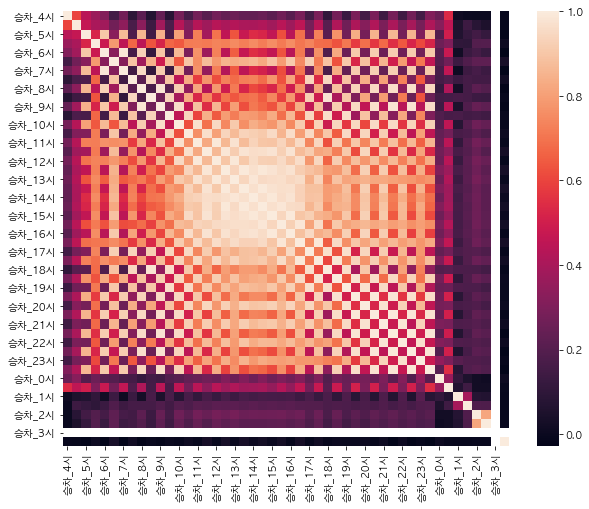

In [8]:
# 상관관계
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.show()

In [9]:
# 지하철역 top10
pd.pivot_table(data=df, index='지하철역', aggfunc='sum').sum(axis=1).sort_values(ascending=False)[:10]

지하철역
잠실(송파구청)    4742529
강남          4475269
서울역         4225238
고속터미널       4095429
홍대입구        3890159
선릉          3573716
사당          3507790
신림          3403013
가산디지털단지     3315718
구로디지털단지     3177940
dtype: int64

In [10]:
# 승+하차 인원으로 합친 데이터프레임 생성
X = pd.DataFrame()

for i in range(0, len(df.columns[2:]), 2):
    col_names = df.columns[2:][i].split("_")[1] # only 시간
    col_values = df.iloc[:, i+2] + df.iloc[:, i+3]  # i+2: 승차, i+3: 하차
    
    X[col_names] = col_values
    
display(X.head())

# 시간별 top10
temp = X.sum().sort_values(ascending=False)[:10]
temp_df = pd.DataFrame({'시간대' : temp.index, '유동인구' : temp.values})

display(temp_df.head())

,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,...,18시,19시,20시,21시,22시,23시,0시,1시,2시,3시
1,641,16043,52831,129673,258855,180429,116889,114799,132040,130950,...,280996,145626,99626,100118,68299,29635,1358,4,4,0
2,142,3477,7461,13687,29705,24612,27010,36769,45775,55661,...,26685,13770,9382,8577,7657,4029,2025,2,0,0
3,30,6865,22765,64025,181992,91697,44902,50500,48037,48464,...,163011,60360,47486,45182,29950,9796,374,0,0,0
4,119,6599,23559,95499,235092,142653,68693,72258,69999,75803,...,241305,101722,77085,83334,64715,26897,533,0,0,0
5,244,6313,15714,27224,74907,78373,73352,88433,97514,105256,...,129552,72289,48929,50699,41059,17144,1049,1,1,0


,시간대,유동인구
0,18시,39585163
1,8시,39253742
2,17시,29460528
3,19시,24784629
4,9시,24521702


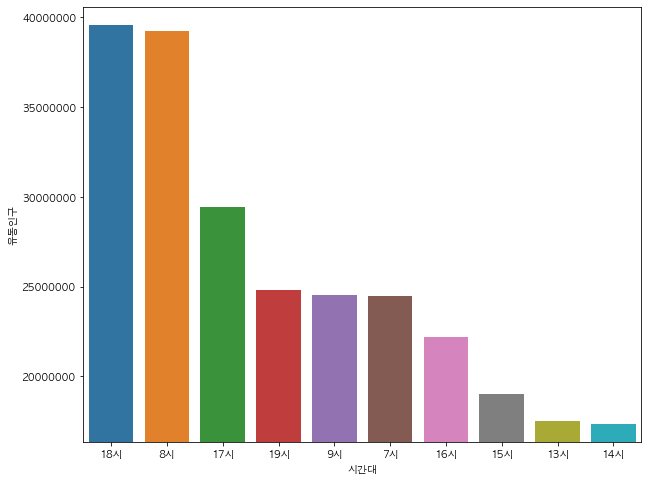

In [11]:
# 시간별 top10 시각화
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=temp_df, x='시간대', y='유동인구')
ax.yaxis.get_major_formatter().set_scientific(False)
plt.ylim(temp.min()-1000000, temp.max()+1000000)  # y축 조정

plt.show()

### 3. 전처리

#### 결측치 처리

In [12]:
# 결측치가 있는 column
# 없음

#### feature scaling

In [13]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#### feature extraction

In [14]:
feature_reducing = True

In [15]:
# PCA 적용
from sklearn.decomposition import PCA

if feature_reducing:
    pca = PCA(n_components=0.9) # PCA(n_components=6)
    pca_data = pca.fit_transform(X)

### 4. 학습하기

In [16]:
# 학습 라이브러리
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

# 계층 군집 dendrogram 시각화
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# 평가 지표 시각화
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# 평가 지표
from sklearn.metrics import silhouette_score, davies_bouldin_score

import os
import random
from pprint import pprint  # 데이터 예쁘게 출력

In [17]:
# random seed 고정
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed) # 모델을 학습시킬 때 마다 seed 고정을 해도 값이 다르게 나올 때 사용
    random.seed(seed)
    np.random.seed(seed)

SEED = 0xC0FFEE
set_seeds(SEED)

In [18]:
# 학습
clustering_method = "sc"  # "km" / "hac" / "dbscan" / "sc"

if clustering_method == "km":
    scores = []

    for n_clusters in range(2, 21):
        model = KMeans(n_clusters=n_clusters)
        pred = model.fit_predict(pca_data)
        scores.append(silhouette_score(pca_data, pred))

    scores = np.array(scores)
    print(f"Best score with K-means at {scores.argmax()+2} clusters, {scores.max():.4f} score.")

elif clustering_method == "hac":
    scores = {}
    
    for linkage in ["single", "average", "complete"]:
        temp_dict = {}
        
        for affinity in ["euclidean", "cosine", "manhattan"]:
            model = AgglomerativeClustering(n_clusters=4, affinity=affinity, linkage=linkage)
            pred = model.fit_predict(pca_data)
            score = davies_bouldin_score(pca_data, pred)
            temp_dict[affinity] = score
        scores[linkage] = temp_dict
    pprint(scores) # dict 데이터 이쁘게 표시

elif clustering_method == "dbscan":
    scores = []
    
    for minPts in [5, 10, 20]:
        for eps in [1, 2, 5, 10]:
            model = DBSCAN(metric="euclidean", min_samples=minPts, eps=eps, n_jobs=-1)
            pred = model.fit_predict(pca_data)
            score = davies_bouldin_score(pca_data, pred)
            scores.append(score)
    scores = np.array(scores)

    print(f"Best score with DBSCAN: {scores.max():.4f}")

elif clustering_method == "sc":
    scores = []
    
    for K in [5, 10, 20]:
        model = SpectralClustering(n_clusters=2, n_components=K)
        score = silhouette_score(pca_data, model.fit_predict(pca_data))
        scores.append(score)
    scores = np.array(scores)

    print(f"Best score with Spectral Clustering: {scores.max():.4f}")

Best score with Spectral Clustering: 0.8152


In [19]:
# K-Means
km = KMeans(n_clusters=2) 
km_pred = km.fit_predict(pca_data)

print('Silhouette score : %.4f' % silhouette_score(pca_data, km_pred))

Silhouette score : 0.6170


In [20]:
# Hierarchical Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
agc_pred = agc.fit_predict(pca_data)

print('Davies bouldi score : %.4f' % davies_bouldin_score(pca_data, agc_pred))

Davies bouldi score : 0.1755


In [21]:
# DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_pred = dbscan.fit_predict(pca_data)

label_unique = np.unique(dbscan_pred)
n_clusters = len(label_unique)

print("Label :", label_unique, ", Number of Clusters :", n_clusters)
print('Davies bouldi score : %.4f' % davies_bouldin_score(pca_data, dbscan_pred))

Label : [-1  0] , Number of Clusters : 2
Davies bouldi score : 0.1349


In [22]:
# SC
sc = SpectralClustering(n_clusters=2, n_components=5)
sc_pred = sc.fit_predict(pca_data)

print('Silhouette score : %.4f' % silhouette_score(pca_data, sc_pred))

Silhouette score : 0.8152


### 5. 정량 평가

In [23]:
# optimal K - elbow method
sse = []

for n_clusters in range(2, 16):
    model = KMeans(n_clusters=n_clusters)
    pred = model.fit_predict(pca_data)
    sse.append(model.inertia_)

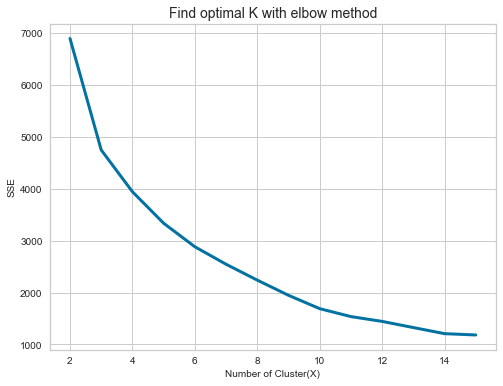

In [24]:
plt.figure(figsize=(8, 6))
plt.title('Find optimal K with elbow method', fontsize=14)
plt.xlabel('Number of Cluster(X)', fontsize=10)
plt.ylabel('SSE', fontsize=10)
plt.plot(range(2, 16), sse, lw=3)

plt.show()

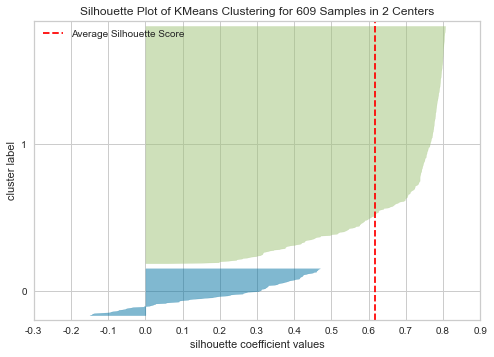

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 609 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# KMeans - SilhouetteVisualizer 
visualizer_2 = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer_2.fit(pca_data)      
visualizer_2.show()

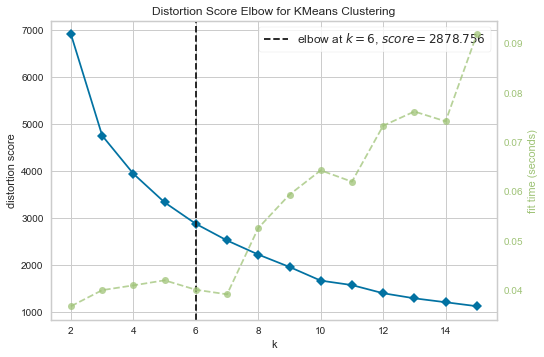

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# KMeans - ElbowVisualizer
visualizer = KElbowVisualizer(km, k=(2,16))
visualizer.fit(pca_data)
visualizer.show() 

### 6. 정성 평가

In [27]:
# 시각화
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=SEED)
tsne_data = tsne.fit_transform(pca_data)

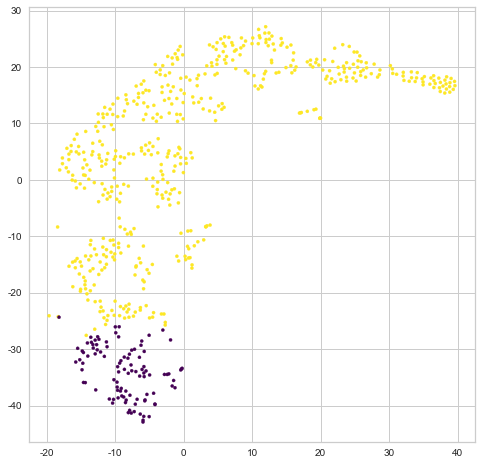

In [28]:
# K-Means
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=km_pred, cmap='viridis')
plt.show()

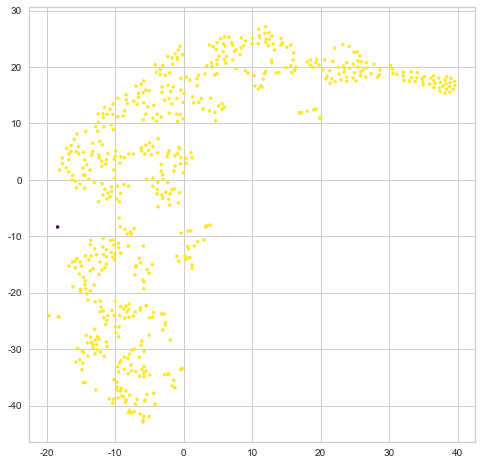

In [29]:
# DBSCAN
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=dbscan_pred, cmap='viridis')
plt.show()

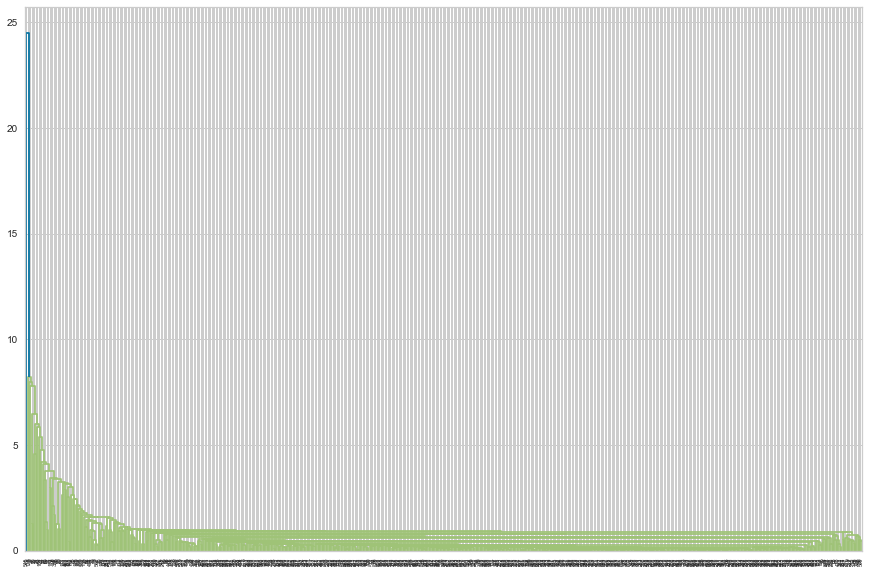

In [30]:
# Dendrogram
plt.figure(figsize=(15, 10))
mergings = linkage(pca_data, method="single", metric='euclidean')
dendrogram(mergings)

plt.show()

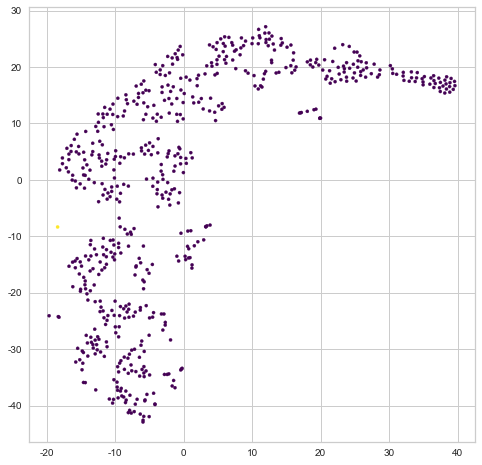

In [31]:
# SpectralClustering
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=sc_pred, cmap='viridis')
plt.show()

In [32]:
# Label
df['Cluster_label'] = km_pred

In [33]:
# Cluster label1
group1 = df.loc[df.Cluster_label == 0, :]
group2 = df.loc[df.Cluster_label == 1, :]
print(group1.shape, group2.shape)

(101, 51) (508, 51)


In [34]:
group1.mean().sort_values(ascending=False)[:5]

하차_8시     101882.633663
승차_18시    100441.009901
하차_18시     80233.386139
승차_17시     74420.178218
하차_9시      71995.405941
dtype: float64

In [35]:
group2.mean().sort_values(ascending=False)[:5]

승차_8시     22512.035433
하차_18시    22064.541339
하차_8시     21709.377953
승차_7시     20113.765748
승차_18시    19937.523622
dtype: float64

- group1 : 8시 하차, 18시 승차, 18시 하차 승객들
- group2 : 8시 승차, 18시 하차, 8시 하차 승객들